In [215]:
import pandas as pd
df_train=pd.read_csv('train_data1.csv')
#print(df_train.head())
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
%matplotlib inline

In [216]:
print(df_train['critic_rating1'].describe())
print(df_train['critic_rating2'].describe())
print(df_train['user_rating1'].describe())
print(df_train['user_rating2'].describe())

count    138.000000
mean      55.637681
std       15.011403
min       11.000000
25%       46.250000
50%       56.000000
75%       66.750000
max       99.000000
Name: critic_rating1, dtype: float64
count    138.000000
mean      58.456522
std       25.518884
min        7.000000
25%       36.000000
50%       61.000000
75%       79.750000
max      100.000000
Name: critic_rating2, dtype: float64
count    138.000000
mean       6.353623
std        1.230818
min        2.000000
25%        5.625000
50%        6.500000
75%        7.175000
max        8.700000
Name: user_rating1, dtype: float64
count    138.000000
mean      58.731884
std       18.621289
min       13.000000
25%       44.000000
50%       57.500000
75%       76.000000
max       93.000000
Name: user_rating2, dtype: float64


In [217]:
#To see how things are working let's see our correlation map
correlation = df_train.corr()
print(correlation)

                critic_rating1  user_rating1  critic_rating2  user_rating2
critic_rating1        1.000000      0.612495        0.914420      0.641103
user_rating1          0.612495      1.000000        0.609038      0.684016
critic_rating2        0.914420      0.609038        1.000000      0.710841
user_rating2          0.641103      0.684016        0.710841      1.000000


In [218]:
a = pd.read_csv("train_data.csv")
b = pd.read_csv("train_data1.csv")
merged = a.merge(b, on='Movie_Name')
merged.to_csv("output.csv", index=False)


In [219]:
data = pd.read_csv("output.csv")
data['ww_gross'].fillna(data['ww_gross'].min(),inplace=True)
data['d_gross'].fillna(data['d_gross'].min(),inplace=True)
data['user_rating1']=(data['user_rating1']*10)
print(data)

     Movie_rating                                         Movie_Name  \
0              99                                         Moonlight    
1              96                             Manchester by the Sea    
2              93                                        La La Land    
3              92                                             Tower    
4              81                                           Arrival    
5              77                                   The Jungle Book    
6              77                             The Edge of Seventeen    
7              74                                             Sully    
8              73                                         From Afar    
9              73                                    Eye in the Sky    
10             72  The Beatles: Eight Days a Week - The Touring Y...   
11             72                                    Doctor Strange    
12             74                         In Order of Disappeara

In [220]:
#data.to_csv('output1.csv', encoding='utf-8')

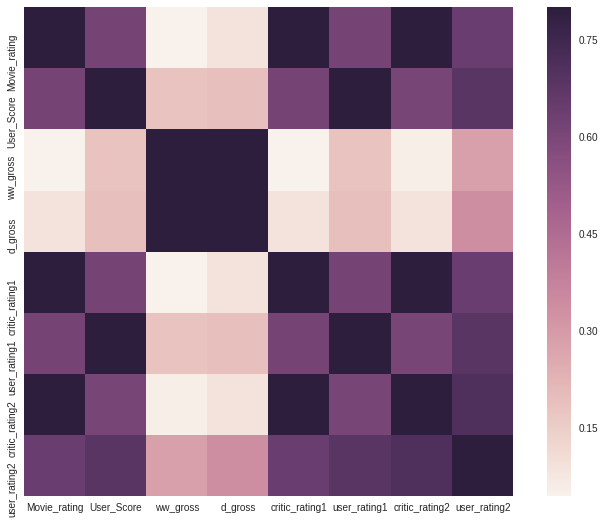

In [221]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

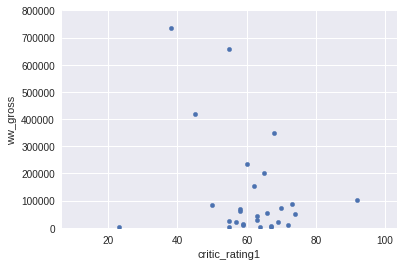

In [222]:
df_train=pd.read_csv('Box_office_OverallData.csv')
var = 'critic_rating1'
data = pd.concat([df_train['ww_gross'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='ww_gross', ylim=(0,800000))

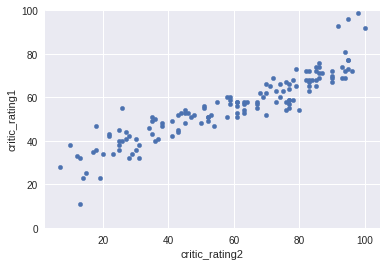

In [223]:
var = 'critic_rating2'
data = pd.concat([df_train['critic_rating1'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='critic_rating1', ylim=(0,100))

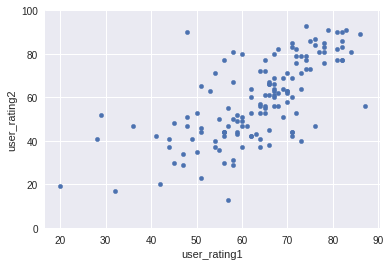

In [224]:
var = 'user_rating1'
data = pd.concat([df_train['user_rating2'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='user_rating2', ylim=(0,100))

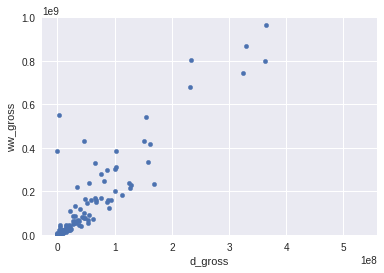

In [225]:
var = 'd_gross'
data = pd.concat([df_train['ww_gross'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='ww_gross', ylim=(0,1000000000))

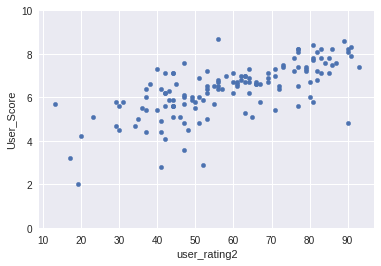

In [226]:
var = 'user_rating2'
data = pd.concat([df_train['User_Score'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='User_Score', ylim=(0,10))

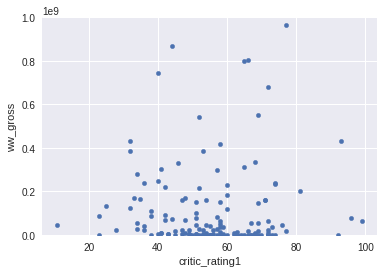

In [227]:
var = 'critic_rating1'
data = pd.concat([df_train['ww_gross'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='ww_gross', ylim=(0,1000000000))

In [228]:
print("Skewness: %f" % df_train['User_Score'].skew())
print("Kurtosis: %f" % df_train['User_Score'].kurt())

print("Skewness of gross: %f" % df_train['ww_gross'].skew())
print("Kurtosis of gross: %f" % df_train['ww_gross'].kurt())

Skewness: -0.736666
Kurtosis: 0.932122
Skewness of gross: 2.531678
Kurtosis of gross: 6.590991


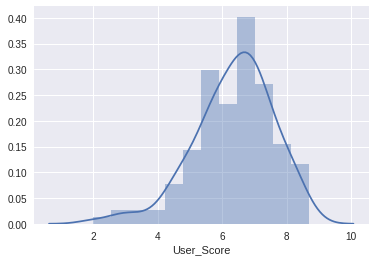

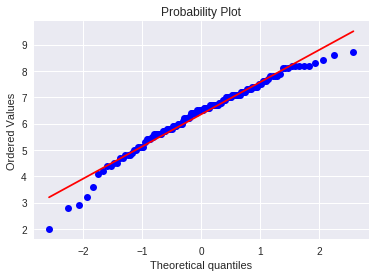

In [229]:
sns.distplot(df_train['User_Score'])
fig = plt.figure()
res = stats.probplot(df_train['User_Score'], plot=plt)

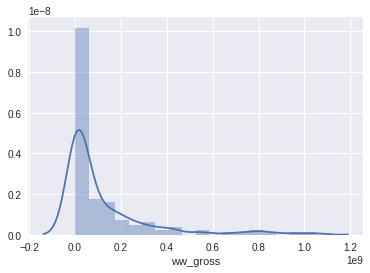

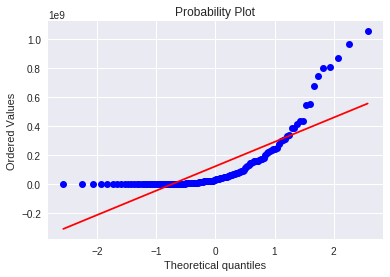

In [230]:
sns.distplot(df_train['ww_gross'])
fig = plt.figure()
res = stats.probplot(df_train['ww_gross'], plot=plt)

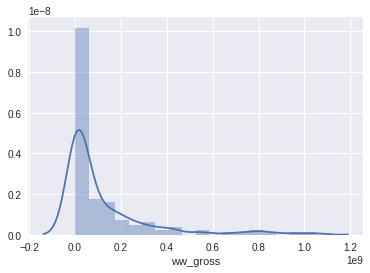

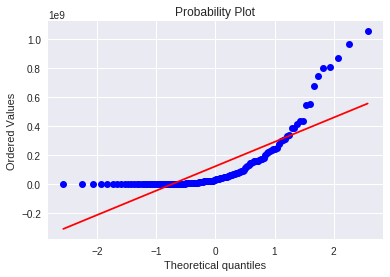

In [231]:
#df_train['ww_gross'] = np.log(df_train['ww_gross'])
sns.distplot(df_train['ww_gross'])
fig = plt.figure()
res = stats.probplot(df_train['ww_gross'], plot=plt)

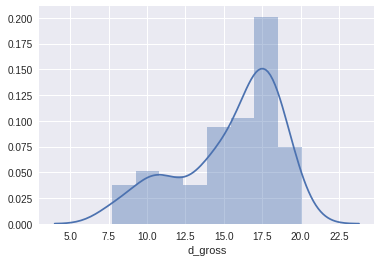

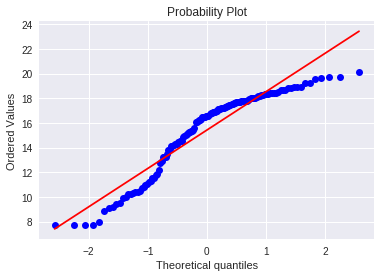

In [232]:
df_train['d_gross'] = np.log(df_train['d_gross'])
sns.distplot(df_train['d_gross'])
fig = plt.figure()
res = stats.probplot(df_train['d_gross'], plot=plt)

In [233]:
df_train.dtypes

Movie_Name          object
Movie_rating         int64
User_Score         float64
Genre               object
ww_gross             int64
d_gross            float64
critic_rating1       int64
user_rating1         int64
critic_rating2       int64
user_rating2         int64
twitter_handles     object
followers_count      int64
dtype: object

In [234]:
del df_train['twitter_handles']

In [235]:
from sklearn import preprocessing
df_train['Genre'].fillna(np.nan,inplace=True)
lbl=preprocessing.LabelEncoder()
lbl.fit(list(df_train['Genre'].values))
df_train['Genre']=lbl.transform(list(df_train['Genre'].values))

In [236]:
df_train.dtypes

Movie_Name          object
Movie_rating         int64
User_Score         float64
Genre                int64
ww_gross             int64
d_gross            float64
critic_rating1       int64
user_rating1         int64
critic_rating2       int64
user_rating2         int64
followers_count      int64
dtype: object

In [237]:
del df_train['Movie_Name']
del df_train['d_gross']
print(df_train['ww_gross'])

0       65339156
1       77662988
2      431286372
3         101987
4      203178872
5      963901123
6       18802255
7      238552082
8          86392
9       34916128
10      10538795
11     677541920
12         50255
13       1144001
14      21343811
15          9241
16      64171419
17     158701644
18     159047649
19         71916
20         21626
21      52461361
22      16847879
23     336398312
24       1672151
25       5429972
26       9537120
27        349876
28          6948
29          2199
         ...    
108     68220952
109      9787624
110      9669521
111    302212434
112    746100054
113    245623848
114      1904720
115    110312958
116     88725100
117       735841
118     38771262
119    240497948
120     22586863
121    165149302
122     28804426
123    277442381
124     55348693
125    171484051
126    124827316
127    387644286
128    433125655
129     20765353
130    133553464
131     85315070
132         2199
133     44223197
134    552198479
135    1475287

In [238]:
from sklearn.model_selection import train_test_split
data=df_train
y=df_train['ww_gross']
X=data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.ensemble import GradientBoostingRegressor
reg1 = GradientBoostingRegressor(n_estimators=4000,learning_rate=0.1,max_depth=7)

reg1.fit(X_train,y_train)
prediction1 = reg1.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(prediction1, y_test))
print(prediction1)

0.982732936394
[  8.34229626e+04   2.63158282e+03   4.21021620e+05   4.35603474e+07
   1.89479519e+06   1.49776287e+08   3.92613394e+08   1.61120637e+08
   2.50787019e+07   1.75402601e+07   2.09287370e+08   1.06284684e+07
   1.64317595e+07   2.23681826e+07   8.05668029e+07   1.00749325e+07
   1.58863459e+06   1.74546429e+07   1.78313424e+08   1.11656202e+04
   8.46367702e+08   2.41683283e+07   1.58777672e+08   1.92421661e+06
   3.39570471e+07   1.63493881e+08   2.02013193e+05   2.94144757e+08]
